<a href="https://colab.research.google.com/github/vaishak-krishnan/Deep-Learning-Architectures/blob/main/LeNet_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib seaborn


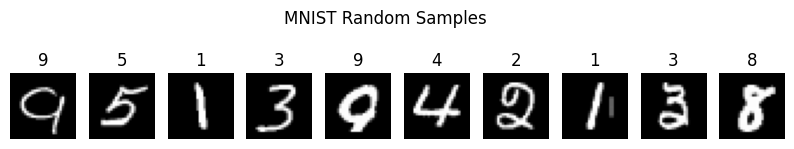

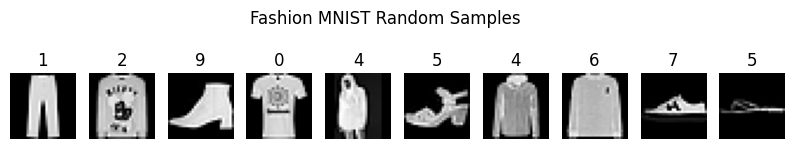

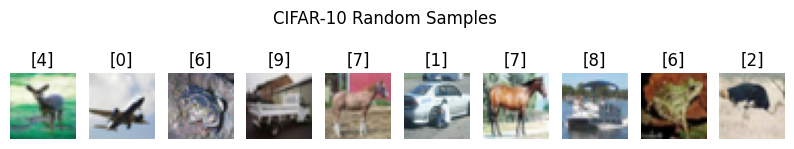

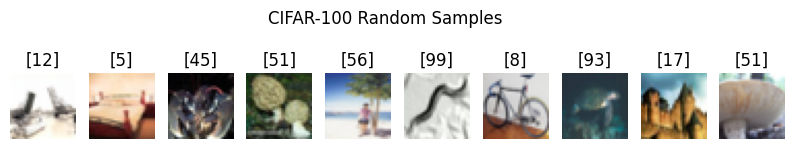

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8477 - loss: 0.4827 - val_accuracy: 0.9723 - val_loss: 0.0808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9739 - loss: 0.0821 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0556 - val_accuracy: 0.9863 - val_loss: 0.0449
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9867 - val_loss: 0.0413
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9882 - val_loss: 0.0397
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9901 - val_loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0205 - 

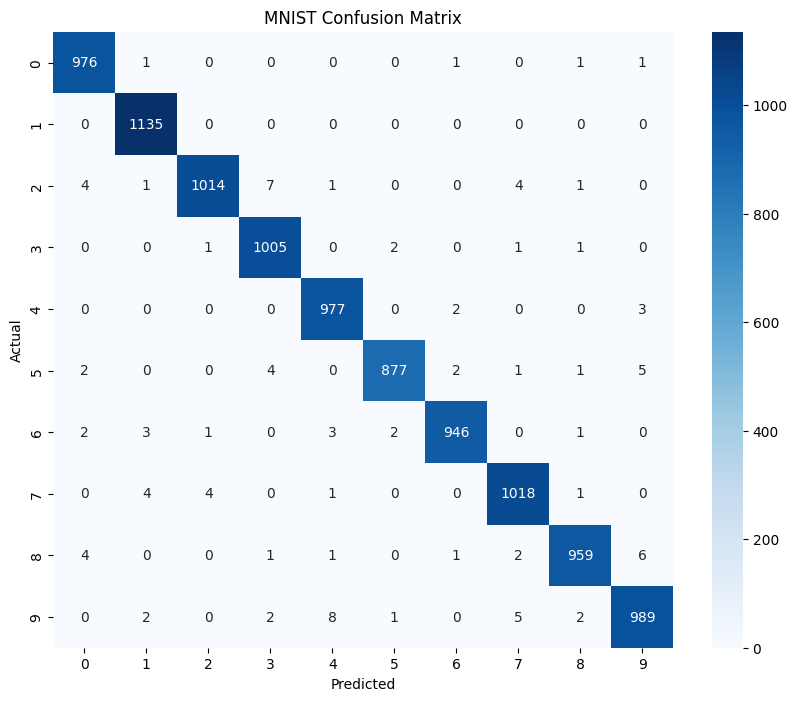

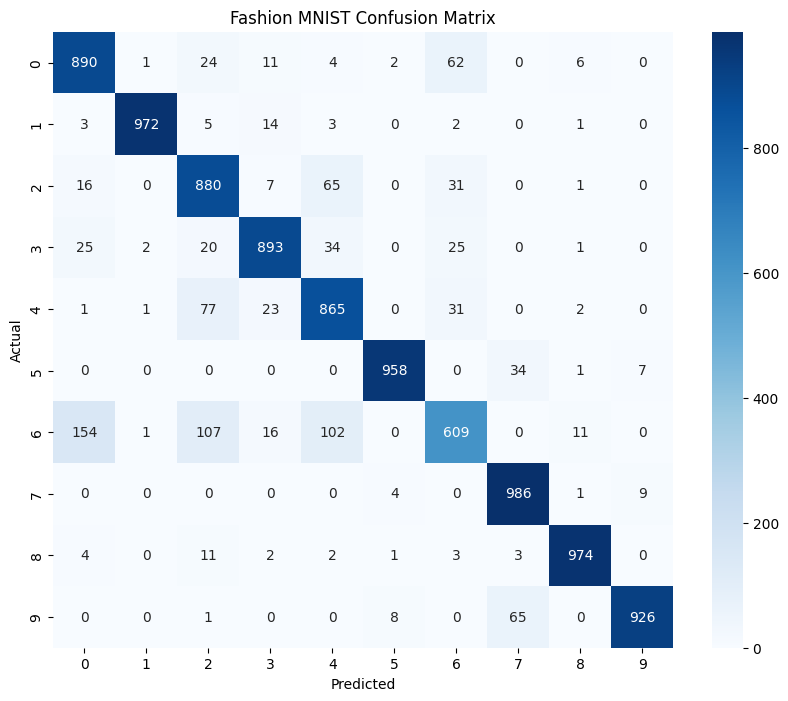

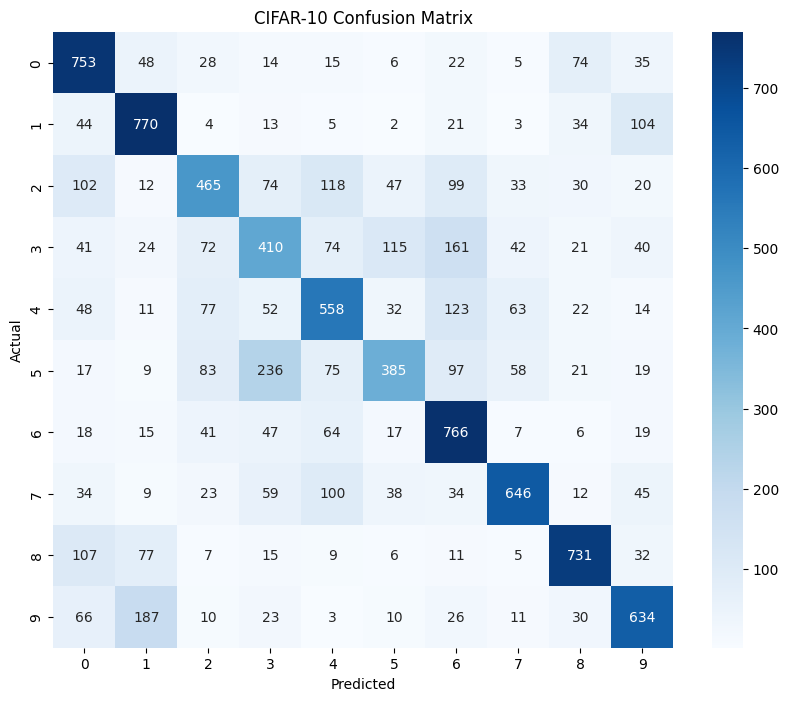

         Dataset  Accuracy  Precision  Recall  F1 Score      Loss
0          MNIST    0.9896   0.989619  0.9896  0.989592  0.037849
1  Fashion MNIST    0.8953   0.896842  0.8953  0.893923  0.299376
2       CIFAR-10    0.6118   0.612275  0.6118  0.606334  1.116107
3      CIFAR-100    0.2823   0.279776  0.2823  0.266838  2.949722

Conclusion:
The model's performance on MNIST dataset shows the following metrics:
  Dataset  Accuracy  Precision  Recall  F1 Score      Loss
0   MNIST    0.9896   0.989619  0.9896  0.989592  0.037849

The model's performance on Fashion MNIST dataset shows the following metrics:
         Dataset  Accuracy  Precision  Recall  F1 Score      Loss
1  Fashion MNIST    0.8953   0.896842  0.8953  0.893923  0.299376

The model's performance on CIFAR-10 dataset shows the following metrics:
    Dataset  Accuracy  Precision  Recall  F1 Score      Loss
2  CIFAR-10    0.6118   0.612275  0.6118  0.606334  1.116107

The model's performance on CIFAR-100 dataset shows the follow

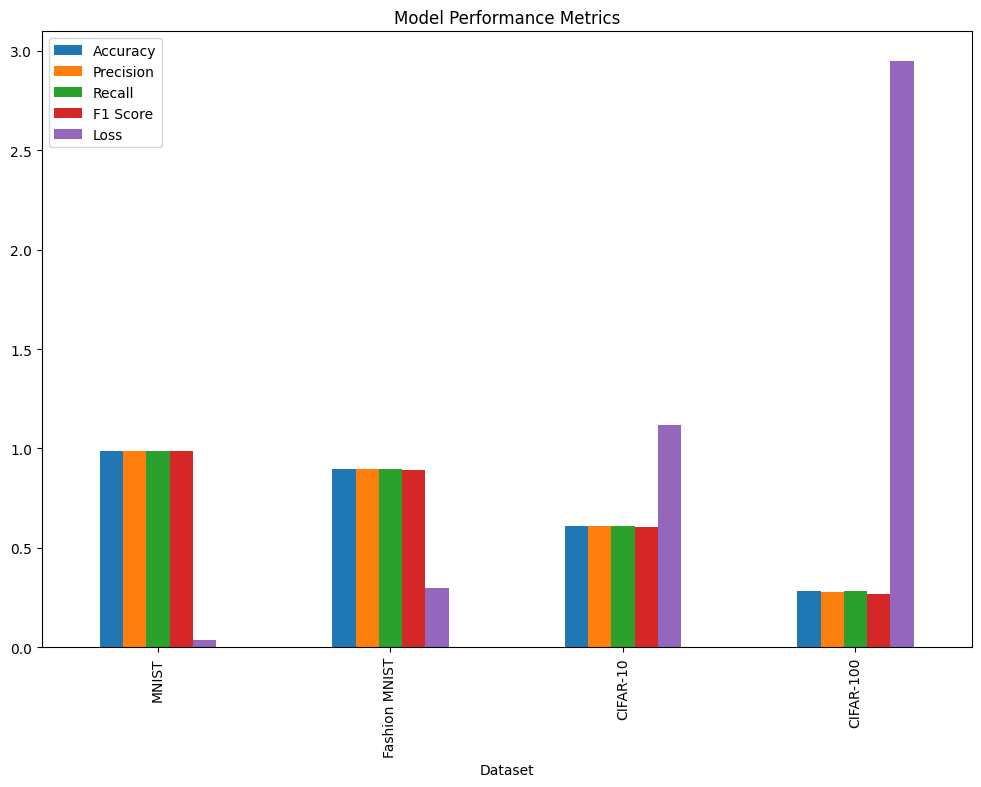

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# Load datasets
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
cifar10 = tf.keras.datasets.cifar10
cifar100 = tf.keras.datasets.cifar100

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
(x_train_cifar100, y_train_cifar100), (x_test_cifar100, y_test_cifar100) = cifar100.load_data()

# Function to plot 10 random samples from a dataset
def plot_random_samples(x_data, y_data, title, num_samples=10):
    indices = random.sample(range(x_data.shape[0]), num_samples)
    samples = x_data[indices]
    labels = y_data[indices]

    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(samples[i], cmap='gray' if len(samples[i].shape) == 2 else None)
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display 10 random samples from each dataset
plot_random_samples(x_train_mnist, y_train_mnist, "MNIST Random Samples")
plot_random_samples(x_train_fashion, y_train_fashion, "Fashion MNIST Random Samples")
plot_random_samples(x_train_cifar10, y_train_cifar10, "CIFAR-10 Random Samples")
plot_random_samples(x_train_cifar100, y_train_cifar100, "CIFAR-100 Random Samples")

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Preprocess datasets
def preprocess_data(x_train, y_train, x_test, y_test, num_classes):
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

# Preprocessing each dataset
num_classes_mnist = 10
num_classes_fashion = 10
num_classes_cifar10 = 10
num_classes_cifar100 = 100

x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = preprocess_data(
    np.expand_dims(x_train_mnist, axis=-1), y_train_mnist, np.expand_dims(x_test_mnist, axis=-1), y_test_mnist, num_classes_mnist)
x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion = preprocess_data(
    np.expand_dims(x_train_fashion, axis=-1), y_train_fashion, np.expand_dims(x_test_fashion, axis=-1), y_test_fashion, num_classes_fashion)
x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10 = preprocess_data(
    x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, num_classes_cifar10)
x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100 = preprocess_data(
    x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100, num_classes_cifar100)

# Function to create and compile the LeNet model
def create_lenet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(6, kernel_size=(5, 5), activation='relu')(inputs)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(120, activation='relu')(x)
    x = Dense(84, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and evaluating the model
def train_and_evaluate(x_train, y_train, x_test, y_test, num_classes):
    input_shape = x_train.shape[1:]
    model = create_lenet_model(input_shape, num_classes)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred_classes, output_dict=True)
    return loss, accuracy, report, confusion_matrix(y_true, y_pred_classes)

# Evaluate MNIST
loss_mnist, accuracy_mnist, report_mnist, cm_mnist = train_and_evaluate(
    x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, num_classes_mnist)
# Evaluate Fashion MNIST
loss_fashion, accuracy_fashion, report_fashion, cm_fashion = train_and_evaluate(
    x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion, num_classes_fashion)
# Evaluate CIFAR-10
loss_cifar10, accuracy_cifar10, report_cifar10, cm_cifar10 = train_and_evaluate(
    x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, num_classes_cifar10)
# Evaluate CIFAR-100
loss_cifar100, accuracy_cifar100, report_cifar100, cm_cifar100 = train_and_evaluate(
    x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100, num_classes_cifar100)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices (excluding CIFAR-100)
plot_confusion_matrix(cm_mnist, "MNIST Confusion Matrix")
plot_confusion_matrix(cm_fashion, "Fashion MNIST Confusion Matrix")
plot_confusion_matrix(cm_cifar10, "CIFAR-10 Confusion Matrix")

import pandas as pd

# Function to extract metrics from the report
def extract_metrics(report):
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    return precision, recall, f1_score

# Extract metrics for each dataset
precision_mnist, recall_mnist, f1_mnist = extract_metrics(report_mnist)
precision_fashion, recall_fashion, f1_fashion = extract_metrics(report_fashion)
precision_cifar10, recall_cifar10, f1_cifar10 = extract_metrics(report_cifar10)
precision_cifar100, recall_cifar100, f1_cifar100 = extract_metrics(report_cifar100)

# Create a DataFrame for the report
report_data = {
    "Dataset": ["MNIST", "Fashion MNIST", "CIFAR-10", "CIFAR-100"],
    "Accuracy": [accuracy_mnist, accuracy_fashion, accuracy_cifar10, accuracy_cifar100],
    "Precision": [precision_mnist, precision_fashion, precision_cifar10, precision_cifar100],
    "Recall": [recall_mnist, recall_fashion, recall_cifar10, recall_cifar100],
    "F1 Score": [f1_mnist, f1_fashion, f1_cifar10, f1_cifar100],
    "Loss": [loss_mnist, loss_fashion, loss_cifar10, loss_cifar100]
}

report_df = pd.DataFrame(report_data)
print(report_df)

# Plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
report_df.plot(x='Dataset', y=metrics, kind='bar', figsize=(12, 8), title='Model Performance Metrics')

# Conclusion
print("\nConclusion:")
for dataset in report_df['Dataset']:
    print(f"The model's performance on {dataset} dataset shows the following metrics:\n{report_df[report_df['Dataset'] == dataset]}\n")
